In [1]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#libraries for calculating accurancy
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

In [3]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data 
#cant use .data and . target unless data is in SKlearn
X = BreastData.data
print('X :\n',X)

#y Data
y = BreastData.target
print('y :',y)

X :
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1

In [4]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [13]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1, #tol 'avilabulty for error' = small num to reduce errpr level
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100, #max_itr 'num of tryes'=big num for better acurancy
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None) #n_jops 'how fast for applying'= -1 or small num for better sol
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',max_iter=10000,C=1.0,random_state=33) #solver ='sag' or 'saga' for  big data &C = num'small num for better acuranccy and solving overfitting problem
LogisticRegressionModel.fit(X_train, y_train) #fit for applying equations and train data ,get best equation for sol

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_) #what classes i have 'here[0,1]'
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_) #.n_iter_ to get num of itrations it used to find sol (dosent equal max_iter cuz it stops when data are similer and it cant have better accurancy)

LogisticRegressionModel Train Score is :  0.9028871391076115
LogisticRegressionModel Test Score is :  0.9574468085106383
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [4250]


In [18]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : \n' , y_pred[:10]) #give me firist 10 predected outputs 
print('Prediction Probabilities Value for LogisticRegressionModel is :\n' , y_pred_prob[:10]) #show probabilitey of firist 10 predected y and how i classify them using 0 prob and 1 prob
print('Y actual is :\n',y_test[:10])

Predicted Value for LogisticRegressionModel is : 
 [0 0 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for LogisticRegressionModel is :
 [[9.83481567e-01 1.65184325e-02]
 [9.99967990e-01 3.20098384e-05]
 [8.00860159e-02 9.19913984e-01]
 [9.99999985e-01 1.50163716e-08]
 [4.19679798e-01 5.80320202e-01]
 [3.51821975e-01 6.48178025e-01]
 [3.25652069e-02 9.67434793e-01]
 [3.37076723e-01 6.62923277e-01]
 [9.65221595e-01 3.47784050e-02]
 [1.94412947e-02 9.80558705e-01]]
Y actual is :
 [0 0 1 0 1 1 1 1 0 1]


Confusion Matrix is : 
 [[ 63   5]
 [  3 117]]


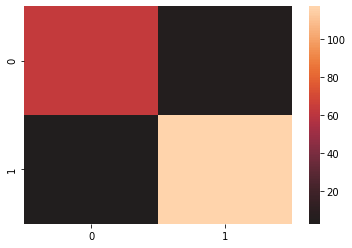

In [20]:
#Calculating Confusion Matrix (true positive, true negative, false positive,false negative)
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [22]:
#matrix moduels
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

#----------------------------------------------------
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#----------------------------------------------------
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

#----------------------------------------------------
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

#----------------------------------------------------
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

#----------------------------------------------------
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

#----------------------------------------------------
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

#----------------------------------------------------
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

#----------------------------------------------------
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

#----------------------------------------------------
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

Accuracy Score is :  180
F1 Score is :  0.9574468085106385
Recall Score is :  0.9574468085106383
Precision Score is :  0.9574468085106383
Precision Recall Score is :  (0.9574468085106383, 0.9574468085106383, 0.9574468085106385, None)
Precision Value is :  [0.63829787 0.95901639 1.        ]
Recall Value is :  [1.    0.975 0.   ]
Thresholds Value is :  [0 1]
Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.96      0.97      0.97       120

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

AUC Value  :  0.9507352941176471
fpr Value  :  [0.         0.07352941 1.        ]
tpr Value  :  [0.    0.975 1.   ]
thresholds Value  :  [2 1 0]
ROCAUC Score :  0.9507352941176471
Zero One Loss Value :  8
